### Import Libraries

In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder

In [330]:
df_appli=pd.read_csv('//Users//zoegong//Desktop//Capstone_Project_I//credit-card-approval-prediction//application_record.csv')
df_credit=pd.read_csv('//Users//zoegong//Desktop//Capstone_Project_I//credit-card-approval-prediction//credit_record.csv')

In [331]:
df=df_appli.merge(df_credit,how='outer',on='ID')  # merge two datasets together

In [415]:
df=df.drop_duplicates(subset=['ID'],keep='first')
df.dropna(0,inplace=True)
    

## Data Visualization

In [333]:
print('income type:',df.NAME_INCOME_TYPE.unique())
print('education type:',df.NAME_EDUCATION_TYPE.unique())
print('family status:',df.NAME_FAMILY_STATUS.unique())
print('housing type:',df.NAME_HOUSING_TYPE.unique())
print('occupation type:',df.OCCUPATION_TYPE.unique())
print('family size:',df.CNT_FAM_MEMBERS .unique())

income type: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student'
 nan]
education type: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree' nan]
family status: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow' nan]
housing type: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment' nan]
occupation type: [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
family size: [ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8. nan]


In [334]:
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].fillna(0)

In [335]:
# Transform some categorical variables into dummies

In [336]:
status_encode={'STATUS':{'C':'good','X':'good','0':'moderate','1':'moderate','2':'risky','3':'risky','4':'risky','5':'risky'}}

In [337]:
df.replace(status_encode,inplace=True)

In [338]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

## Draw Graph

#### Gender and risk relationship

In [339]:
good_status=df[df['STATUS']=='good']
mode_status=df[df['STATUS']=='moderate']
risk_status=df[df['STATUS']=='risky']


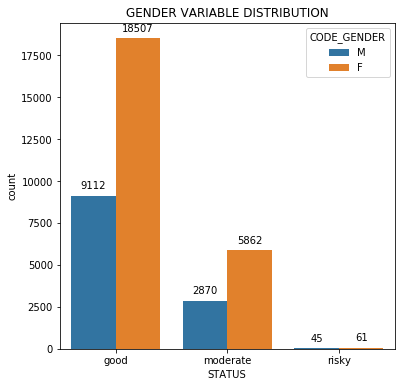

In [340]:
f,axes=plt.subplots(figsize=(6,6))
splot=sns.countplot(x='STATUS',hue='CODE_GENDER',data=df)
axes.set_title('GENDER VARIABLE DISTRIBUTION')

for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

### Number of Children and risk relationship

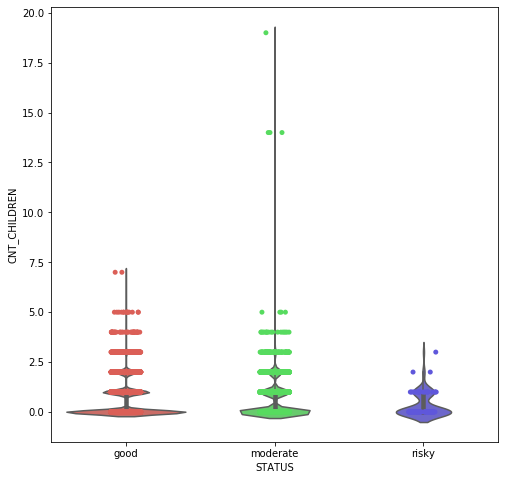

In [423]:
plt.figure(figsize=(8,8))
g1=sns.violinplot(x='STATUS',y='CNT_CHILDREN',data=df,palette='hls',split=True)
g1=sns.stripplot(x='STATUS',y='CNT_CHILDREN',data=df,palette='hls')

### risk and binomial variables relationship

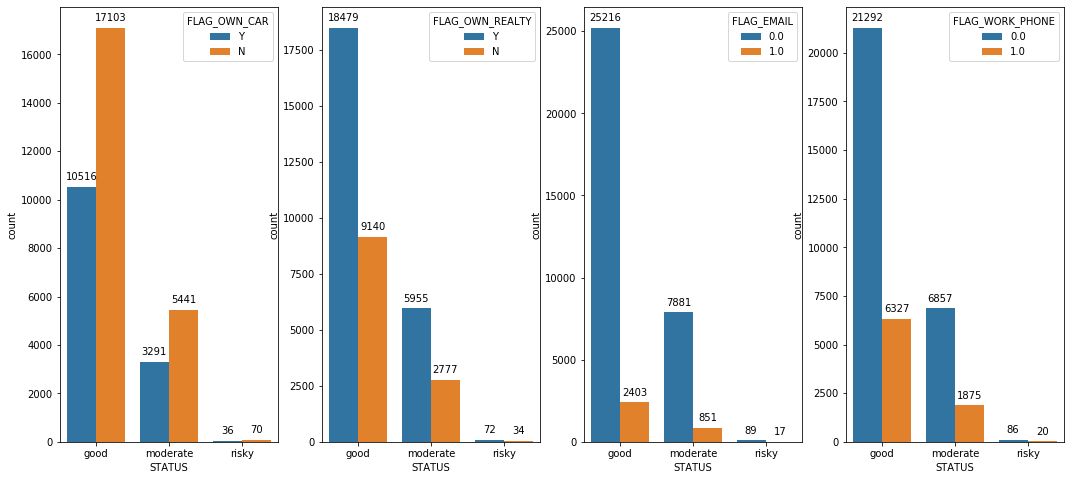

In [342]:
f,axes=plt.subplots(1,4, figsize=(18,8))
splot=sns.countplot(x='STATUS',hue='FLAG_OWN_CAR',data=df,ax=axes[0])
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
    
splot1=sns.countplot(x='STATUS',hue='FLAG_OWN_REALTY',data=df,ax=axes[1])
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

splot2=sns.countplot(x='STATUS',hue='FLAG_EMAIL',data=df,ax=axes[2])
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

splot3=sns.countplot(x='STATUS',hue='FLAG_WORK_PHONE',data=df,ax=axes[3])
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext  = (0, 10), textcoords = 'offset points')      
    

## Own realty and risk relationship (seems like realty is the most important feature) 

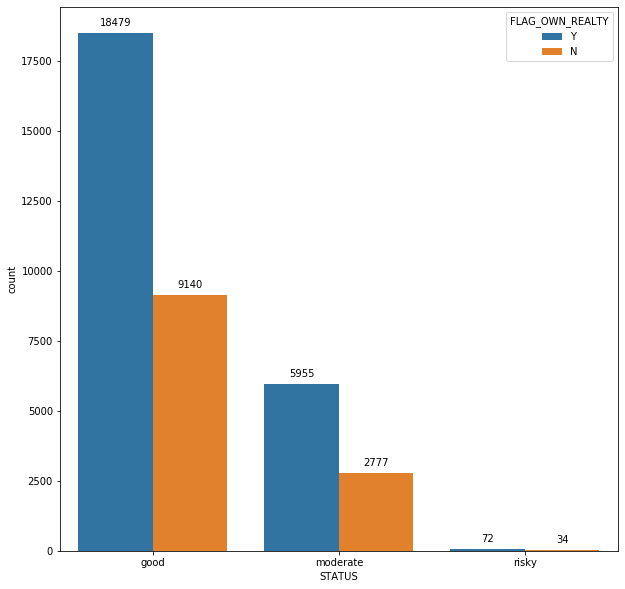

In [343]:
plt.figure(figsize=(10,10))
splot=sns.countplot(x='STATUS',hue='FLAG_OWN_REALTY',data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

In [344]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

### Number of Children/number of family members and Risk 

Text(0, 0.5, 'Family Size')

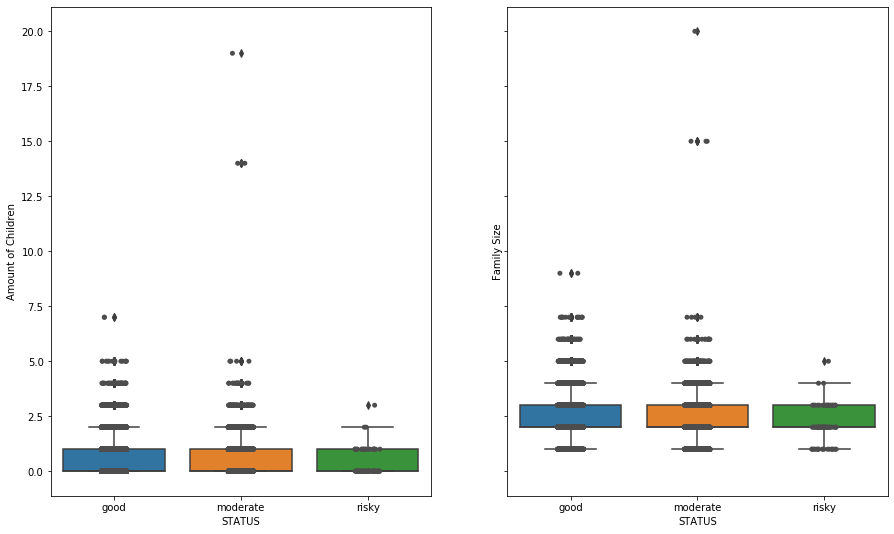

In [431]:
f,axes=plt.subplots(1,2,figsize=(15,9),sharey=True)
g2=sns.boxplot(x='STATUS',y='CNT_CHILDREN',data=df,ax=axes[0])
g4=sns.stripplot(x='STATUS',y='CNT_CHILDREN',data=df,color='.3',ax=axes[0])
g2.set_ylabel('Amount of Children')
g3=sns.boxplot(x='STATUS',y='CNT_FAM_MEMBERS',data=df,ax=axes[1])
g5=sns.stripplot(x='STATUS',y='CNT_FAM_MEMBERS',data=df,color='.3',ax=axes[1])
g3.set_ylabel('Family Size')


Text(0, 0.5, 'FAMILY SIZE')

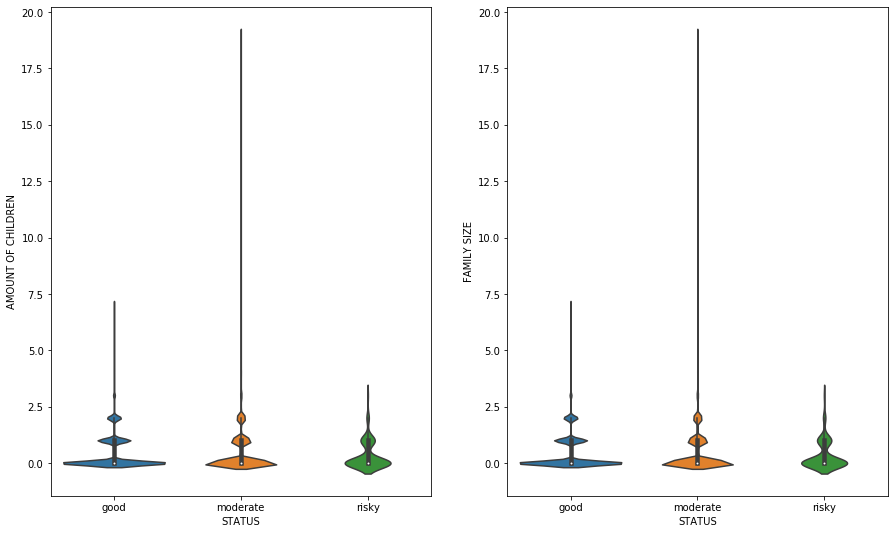

In [371]:
f,axes=plt.subplots(1,2,figsize=(15,9))
g3=sns.violinplot(y='CNT_CHILDREN',x='STATUS' ,data=df,ax=axes[0])
g3.set_ylabel('AMOUNT OF CHILDREN')

g4=sns.violinplot(y='CNT_CHILDREN',x='STATUS' ,data=df,ax=axes[1])
g4.set_ylabel('FAMILY SIZE')


### income type/amount and risk

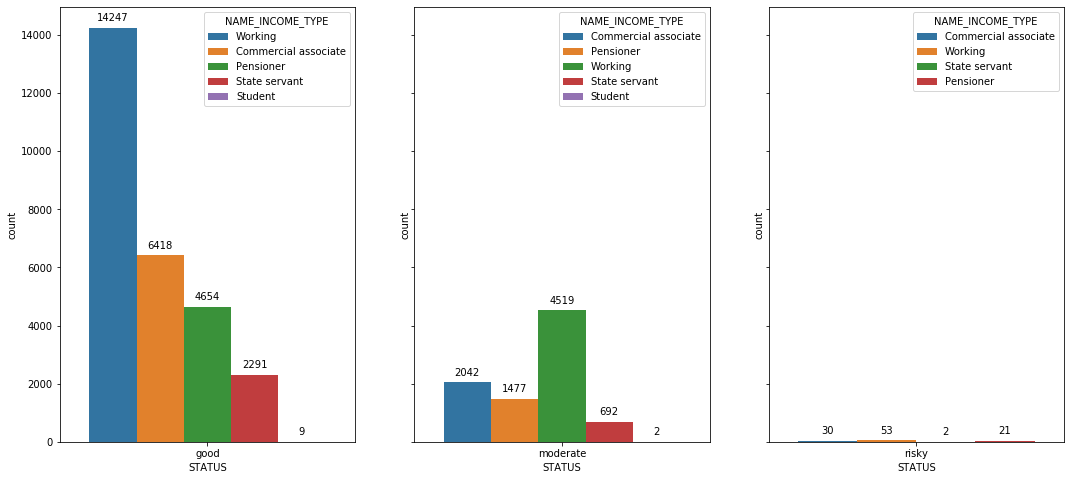

In [347]:
f, axes = plt.subplots(1, 3, figsize=(18,8), sharey=True)
splot1=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=good_status, ax=axes[0])
splot2=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=mode_status,ax=axes[1])
splot3=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=risk_status,ax=axes[2])

for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
    
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

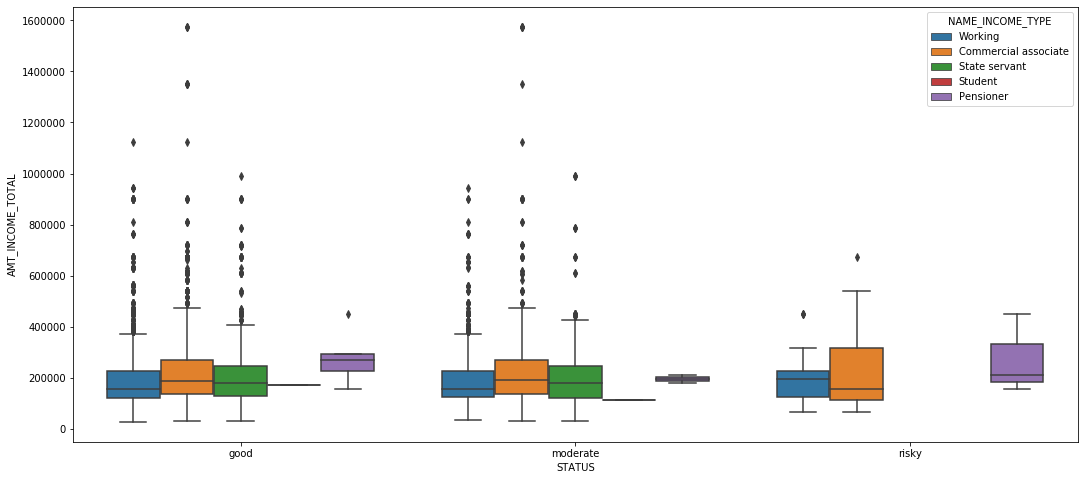

In [434]:
plt.figure(figsize=(18,8))
sns.boxplot(x='STATUS',y='AMT_INCOME_TOTAL',hue='NAME_INCOME_TYPE',data=df)


Text(0, 0.5, 'INCOME TOTAL')

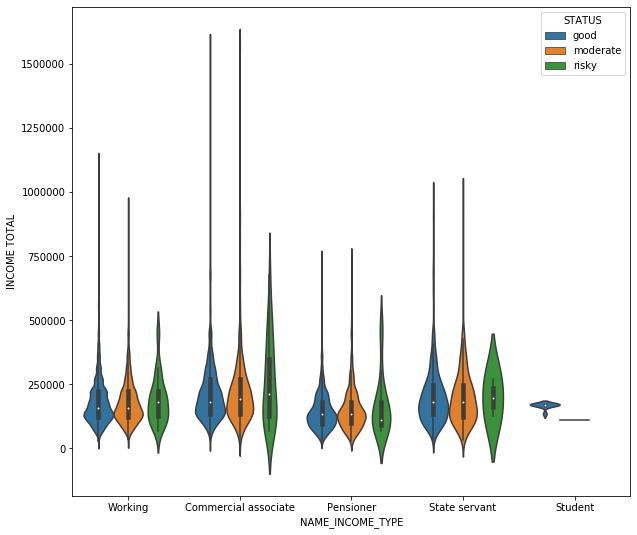

In [351]:
plt.figure(figsize=(10,9))
g=sns.violinplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='STATUS',data=df)
g.set_ylabel('INCOME TOTAL')

### Education and Risk

In [352]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

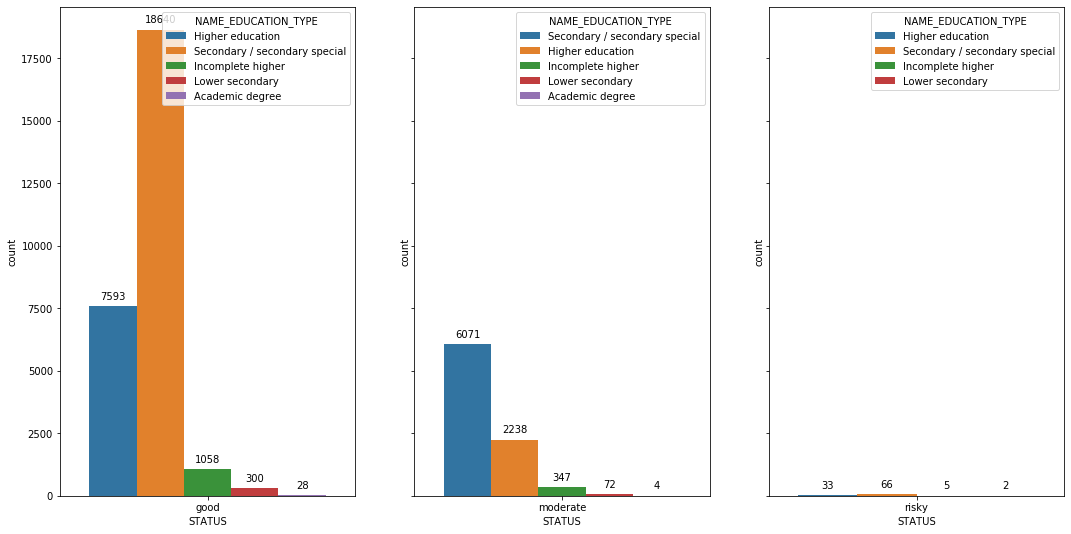

In [361]:
f,axes=plt.subplots(1,3,figsize=(18,9),sharey=True)
splot1=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=good_status,ax=axes[0])
splot2=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=mode_status,ax=axes[1])
splot3=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=risk_status,ax=axes[2])

for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')   
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

#### HOUSING TYPE and Risk


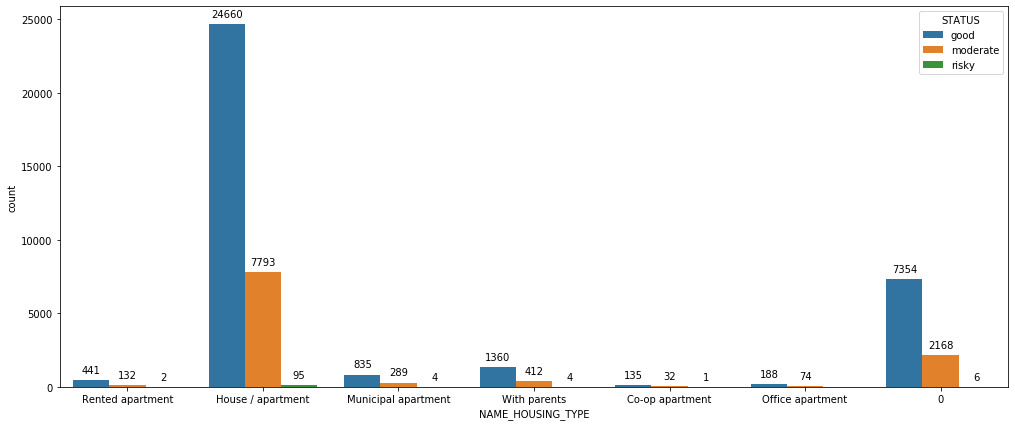

In [377]:
plt.figure(figsize=(17,7))
splot1=sns.countplot(x='NAME_HOUSING_TYPE',hue='STATUS',data=df)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

In [378]:
# People who live in house/apartment are more inclined to pay credit card on time

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow', nan], dtype=object)

#### NAME_FAMILY_STATUS

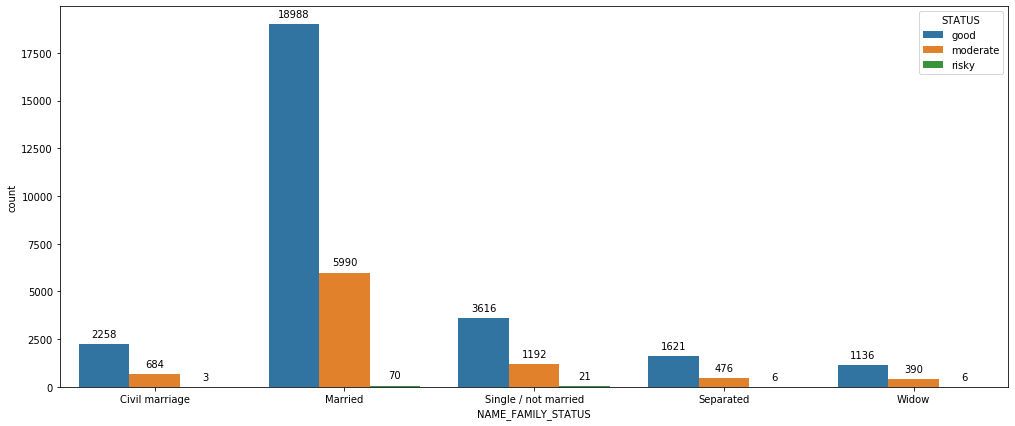

In [379]:
plt.figure(figsize=(17,7))
splot1=sns.countplot(x='NAME_FAMILY_STATUS',hue='STATUS',data=df)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

### 'DAYS_BIRTH'

In [418]:
# convert days into years and see years as age

age=[]
for item in df['DAYS_BIRTH'].values:
    age_year=round(abs(item)/365)
    age.append(age_year)

age=np.array(age)
df['age_year']=age

In [419]:
# age for good credit:
good_age=df[df['STATUS']=='good']['age_year']
# age for moderate credit:
moderate_age=df[df['STATUS']=='moderate']['age_year']
# age for risky credit:
risky_age=df[df['STATUS']=='risky']['age_year']

Text(0.5, 1.0, 'RISKY CREDIT AGE DISTRIBUTION')

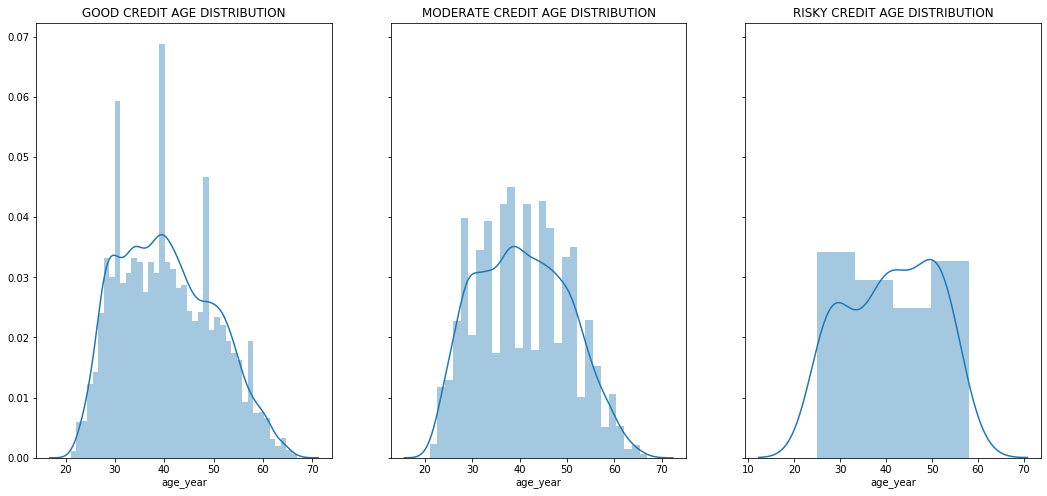

In [446]:
f,axes=plt.subplots(1,3,figsize=(18,8),sharey=True)
f1=sns.distplot(good_age,kde=True,rug=False,ax=axes[0])
f1.set_title('GOOD CREDIT AGE DISTRIBUTION')
f2=sns.distplot(moderate_age,kde=True,rug=False,ax=axes[1])
f2.set_title('MODERATE CREDIT AGE DISTRIBUTION')
f3=sns.distplot(risky_age,kde=True,rug=False,ax=axes[2])
f3.set_title('RISKY CREDIT AGE DISTRIBUTION')


In [413]:
# categorize age into several groups as young, adults, and seniors

#define age interval: 

